## ANN Classifier
### Builds and Trains a neural network to classify images from MNIST as the correct integer
#### Loading the data

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data = tf.keras.datasets.mnist.load_data()

#### Splitting data into training & testing, and scaling pixel values to be between 0 and 1

In [24]:
(x_train, y_train), (x_test, y_test) = data
print(len(x_train), len(y_train))
x_train = x_train/255
x_test = x_test/255

60000 60000


#### Displaying a random image from the training dataset

Text(0.5, 1.0, 'Target Value: 9')

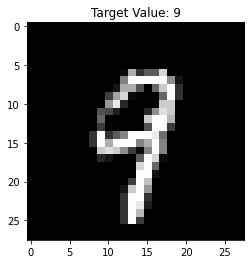

In [27]:
index = np.random.randint(0, len(y_train))
plt.imshow(x_train[index], cmap = "gray")
plt.title(f"Target Value: {y_train[index]}")

#### Building and training the model

In [29]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation = "softmax")
])


In [30]:
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [31]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3012 - acc: 0.9126 - val_loss: 0.1435 - val_acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1448 - acc: 0.9565 - val_loss: 0.1027 - val_acc: 0.9692
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1089 - acc: 0.9664 - val_loss: 0.0850 - val_acc: 0.9752
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0902 - acc: 0.9725 - val_loss: 0.0813 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0762 - acc: 0.9763 - val_loss: 0.0739 - val_acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0663 - acc: 0.9785 - val_loss: 0.0677 - val_acc: 0.9792
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0603 - acc: 0.9804 - val_loss: 0.

#### Evaluating the model

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
##model.predict_classes(x_test) is deprecated, so it is recommended to use np.argmax(model.predict(x), axis=-1)
import numpy as np
print(confusion_matrix(y_test, np.argmax(model.predict(x_test), axis =-1)))
print(classification_report(y_test, np.argmax(model.predict(x_test), axis =-1)))



[[ 972    1    2    0    1    0    2    1    1    0]
 [   0 1128    3    0    0    0    1    0    3    0]
 [   5    0 1008    2    1    0    1    5    9    1]
 [   0    0    8  984    0    8    0    5    5    0]
 [   0    0    2    0  962    0    8    0    3    7]
 [   3    0    0    5    2  866    5    2    7    2]
 [   4    2    1    1    3    3  940    1    3    0]
 [   1    6   12    2    1    0    0  996    2    8]
 [   3    0    1    3    5    2    0    4  955    1]
 [   2    5    0    5   12    1    1    4    4  975]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97   

In [34]:
import matplotlib.pyplot as plt

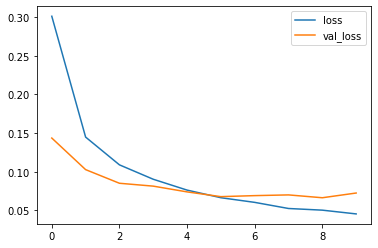

In [39]:
r.history
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

#### Our model is working pretty well with an accuracy of over 98%